In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.8.0-py2.py3-none-any.whl size=259938 sha256=c74a3432b838126ebca302cf148fe5833fa235fbdf16b82f8892cc52b68ceb5c
  Stored in directory: C:\Users\SARATH~1\AppData\Local\Temp\pip-ephem-wheel-cache-_860j323\wheels\cc\d5\09\083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
Successfully built pandas-profiling
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas_profiling

In [4]:
df = pd.read_csv('C:\\Users\\SarathBabuMallam\\Desktop\\Data science\\Machine Learning\\ML recordings\\Linear Regression Practice (14-06-2020)\Assignment\\Ecommerce_Customers')

In [5]:
df.count()

Email                   500
Address                 500
Avatar                  500
Avg. Session Length     500
Time on App             500
Time on Website         500
Length of Membership    500
Yearly Amount Spent     500
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


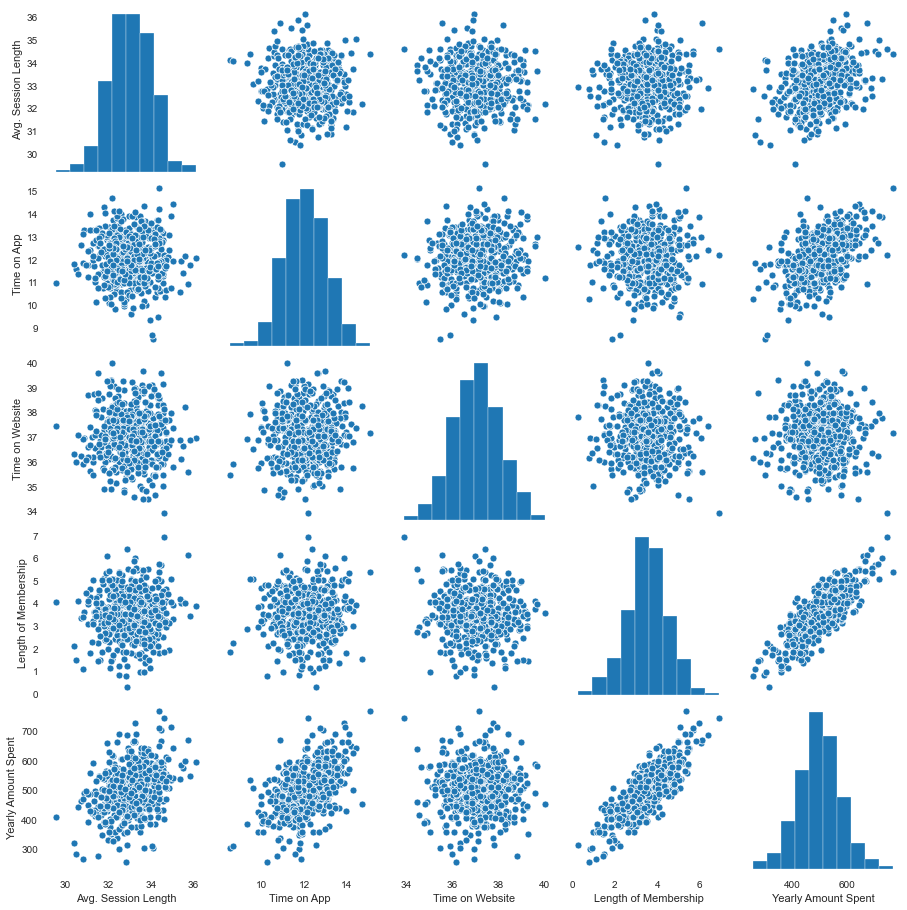

In [9]:
sns.pairplot(df)

In [10]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


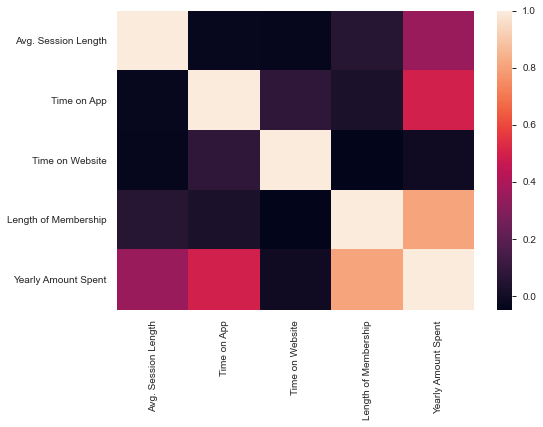

In [11]:
sns.heatmap(df.corr())

In [12]:
pandas_profiling.ProfileReport(df)

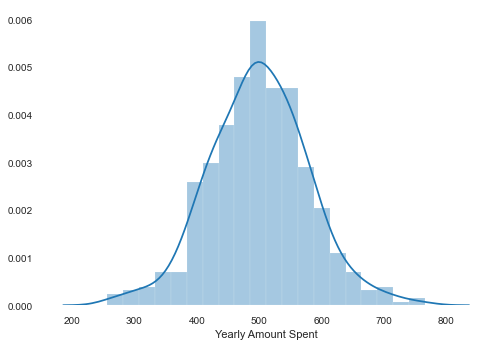

In [13]:
sns.distplot(df['Yearly Amount Spent'])

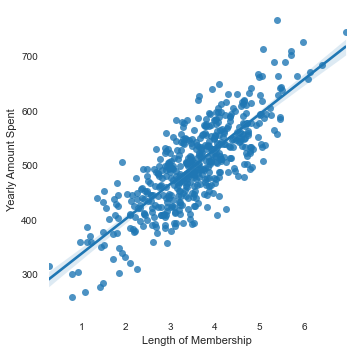

In [14]:
sns.lmplot(x="Length of Membership", y="Yearly Amount Spent", data=df)

In [15]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [17]:
X = df.drop(['Email','Address','Avatar','Yearly Amount Spent'],axis=1)
Y = df['Yearly Amount Spent']

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(
     X, Y, test_size=0.4, random_state=101)

In [19]:
X_train.shape

(300, 4)

In [20]:
X_test.shape

(200, 4)

In [21]:
scx = StandardScaler()

In [22]:
X_train_std = scx.fit_transform(X_train)

In [23]:
X_train_std

array([[ 1.26799522,  1.45940118,  0.23617032,  0.09143508],
       [ 1.09362244,  1.22111315,  1.88136988, -0.283246  ],
       [-1.75352154,  0.1119345 , -1.69436204, -0.44196072],
       ...,
       [-1.1990249 ,  0.46066757,  0.38023355, -0.53918796],
       [ 0.83265112, -0.46928258,  0.02145387,  0.19843404],
       [-0.84063534, -0.67939728,  1.18861913,  1.29228412]])

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X_train_std,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
lr.coef_

array([25.9407292 , 35.70914747,  0.53291272, 61.71966787])

In [27]:
lr.intercept_

496.8796120064135

In [28]:
X_test_std = scx.transform(X_test)

In [29]:
predictions = lr.predict(X_test_std)

In [30]:
print(mean_absolute_error(Y_test,predictions))
print(mean_squared_error(Y_test,predictions))
print(np.sqrt(mean_squared_error(Y_test,predictions)))
print(r2_score(Y_test,predictions))

7.742671285838744
93.83297800820084
9.686742383701594
0.9855061240024658


In [31]:
for i in [10,100, 1000, 10000, 100000, 1000000, 10000000]:
    ridge = Ridge(alpha=i)
    ridge.fit(X_train_std, Y_train)
    pred_ridge = ridge.predict(X_test_std)
    print("Lambda is "+str(i)+" ", ridge.coef_)
    print(mean_absolute_error(Y_test,pred_ridge))
    print(r2_score(Y_test,pred_ridge))

Lambda is 10  [25.10376422 34.6183187   0.4764114  59.82404048]
8.211682512584117
0.9839244683779355
Lambda is 100  [19.45339794 27.15086513  0.16178004 46.87144938]
17.606177565826762
0.923750641329531
Lambda is 1000  [ 5.98206878  8.59557746 -0.10723917 14.81468263]
48.710929076215095
0.4075768013094041
Lambda is 10000  [ 0.75475961  1.0970166  -0.02151335  1.89005532]
61.48267473928532
0.05310170463929942
Lambda is 100000  [ 0.07750398  0.1128177  -0.00231679  0.19436712]
63.15743745260446
0.0004097717057042205
Lambda is 1000000  [ 0.00777128  0.01131391 -0.00023342  0.01949201]
63.33011343670677
-0.00510569078857559
Lambda is 10000000  [ 7.77337300e-04  1.13171292e-03 -2.33591155e-05  1.94975543e-03]
63.34743466257552
-0.005659802963886351


In [32]:
for i in [10,100, 1000, 10000, 100000, 1000000, 10000000]:
    lasso = Lasso(alpha=i)
    lasso.fit(X_train_std, Y_train)
    pred_lasso = lasso.predict(X_test_std)
    print("Lambda is "+str(i)+" ", lasso.coef_)
    print(mean_absolute_error(Y_test,pred_lasso))
    print(r2_score(Y_test,pred_lasso))

Lambda is 10  [15.57736072 25.56680207  0.         52.74295434]
17.29681772919715
0.9280943837689293
Lambda is 100  [ 0.  0. -0.  0.]
63.34935984699618
-0.005721399902177904
Lambda is 1000  [ 0.  0. -0.  0.]
63.34935984699618
-0.005721399902177904
Lambda is 10000  [ 0.  0. -0.  0.]
63.34935984699618
-0.005721399902177904
Lambda is 100000  [ 0.  0. -0.  0.]
63.34935984699618
-0.005721399902177904
Lambda is 1000000  [ 0.  0. -0.  0.]
63.34935984699618
-0.005721399902177904
Lambda is 10000000  [ 0.  0. -0.  0.]
63.34935984699618
-0.005721399902177904


In [33]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

# Find the Linear Regression without Time on Website

In [34]:
XA = df.drop(['Email','Address','Avatar','Time on Website','Yearly Amount Spent'],axis=1)
YA = df['Yearly Amount Spent']

In [35]:
XA_train, XA_test, YA_train, YA_test = train_test_split(
     XA, YA, test_size=0.4, random_state=101)

In [36]:
XA_train_std = scx.fit_transform(XA_train)

In [37]:
XA_train_std

array([[ 1.26799522e+00,  1.45940118e+00,  9.14350801e-02],
       [ 1.09362244e+00,  1.22111315e+00, -2.83246001e-01],
       [-1.75352154e+00,  1.11934499e-01, -4.41960722e-01],
       [ 8.61574790e-01,  9.42108409e-01, -2.02984657e+00],
       [ 8.33070518e-01,  4.97217835e-01,  1.12347869e+00],
       [ 1.12421437e+00,  1.24922310e-01, -1.17048358e-01],
       [-5.02926155e-01,  3.47612752e-01, -1.20560405e+00],
       [ 7.39401950e-01,  1.07439546e+00, -1.49462863e+00],
       [ 4.97517634e-01, -1.85842310e-01, -1.74480413e+00],
       [ 1.40921282e+00, -1.16629246e-01,  8.35378353e-01],
       [-1.19767063e+00, -8.05160337e-01, -8.44652832e-01],
       [ 8.66972522e-01,  2.54122396e-01, -4.90506450e-01],
       [-6.07048408e-01, -6.13472575e-01, -9.26510248e-01],
       [-1.42430669e+00,  2.07923951e-01, -9.99249520e-02],
       [-3.90231742e-01,  6.47863941e-01,  1.71016969e+00],
       [-9.98400150e-01,  6.54915210e-01,  1.52180663e+00],
       [-4.74537812e-01, -2.43245314e-01

In [38]:
lra = LinearRegression()

In [39]:
lra.fit(XA_train_std,YA_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
lra.coef_

array([25.95073744, 35.76802639, 61.67083175])

In [41]:
lra.intercept_

496.8796120064135

In [42]:
XA_test_std = scx.transform(XA_test)

In [43]:
predictions_app = lra.predict(XA_test_std)

In [44]:
print(mean_absolute_error(YA_test,predictions_app))
print(mean_squared_error(YA_test,predictions_app))
print(np.sqrt(mean_squared_error(YA_test,predictions_app)))
print(r2_score(YA_test,predictions_app))

7.71414243096342
93.79530581081737
9.684797664939488
0.9855119430244027


In [45]:
for i in [10,100, 1000, 10000, 100000, 1000000, 10000000]:
    ridge_app = Ridge(alpha=i)
    ridge_app.fit(XA_train_std, YA_train)
    pred_ridge_app = ridge_app.predict(XA_test_std)
    print("Lambda is "+str(i)+" ", ridge_app.coef_)
    print(mean_absolute_error(YA_test,pred_ridge_app))
    print(r2_score(YA_test,pred_ridge_app))

Lambda is 10  [25.11223111 34.66912998 59.78192039]
8.212407638824558
0.9839231308391848
Lambda is 100  [19.45529317 27.16402214 46.8605874 ]
17.608793694376203
0.9237368281267171
Lambda is 1000  [ 5.98183488  8.5929846  14.81679971]
48.70389965745521
0.4075967944992702
Lambda is 10000  [0.75475511 1.09695172 1.89010804]
61.48109786791507
0.053105551917277394
Lambda is 100000  [0.07750393 0.11281698 0.19436771]
63.1572672824083
0.0004101785884126352
Lambda is 1000000  [0.00777128 0.0113139  0.01949201]
63.33009628842083
-0.0051056498792969585
Lambda is 10000000  [0.00077734 0.00113171 0.00194976]
63.34743294642755
-0.005659798870750077


In [48]:
result = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficients'])
result

,Coefficients
Avg. Session Length,25.940729
Time on App,35.709147
Time on Website,0.532913
Length of Membership,61.719668


In [51]:
print("result_r2_score:::",r2_score(Y_test,predictions))

result_r2_score::: 0.9855061240024658


In [54]:
result_app = pd.DataFrame(lra.coef_,XA.columns,columns=['Coefficients'])
result_app

,Coefficients
Avg. Session Length,25.950737
Time on App,35.768026
Length of Membership,61.670832


In [56]:
print("result_r2_score_onlyApp:::",r2_score(YA_test,predictions))

result_r2_score_onlyApp::: 0.9855061240024658


# How can you interpret these coefficients?

The coefficients indicate how many units "Yearly Amount Spent" are increased with one unit of the quantities given in the table.

# Problem Statement:

You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out.

# Conclusion

1. The "Yearly Amount Spent" is almost negligible for the people who is spending time on website when calculates with coefficient factor (0.5).
2. There is not major difference in the "Yearly spent Amount" if we wont consider the time spent on website/through website purchases.
3. Improving the Website user experiance and usability may increase the sales which is direclty impact the Yearly Spent Amount